In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('RFLFSODataFull.csv')
print(data.head())

    FSO_Att   RFL_Att  AbsoluteHumidity  AbsoluteHumidityMax  \
0  7.913289  6.927868         17.595709            17.615907   
1  7.451176  4.412096         17.549693            17.572415   
2  7.072747  6.268740         17.290230            17.644014   
3  6.949288  4.317853         16.820880            17.066776   
4  7.361052  6.114514         16.813820            17.953974   

   AbsoluteHumidityMin     Distance    Frequency  Particulate  ParticulateMax  \
0            17.340148  2115.338398  83500000000          0.0             0.0   
1            17.299439  2113.999257  73500000000          0.0             0.0   
2            16.037894  2118.689047  83500000000          0.0             0.0   
3            15.895622  2114.632339  73500000000          0.0             0.0   
4            15.227225  2116.786055  83500000000          0.0             0.0   

   ParticulateMin  ...  TemperatureMax  TemperatureMin  Time   Visibility  \
0             0.0  ...       26.603030       24.680

In [3]:
print(data.isnull().sum())


FSO_Att                  0
RFL_Att                  0
AbsoluteHumidity         0
AbsoluteHumidityMax      0
AbsoluteHumidityMin      0
Distance                 0
Frequency                0
Particulate              0
ParticulateMax           0
ParticulateMin           0
RainIntensity            0
RainIntensityMax         0
RainIntensityMin         0
RelativeHumidity         0
SYNOPCode                0
Temperature              0
TemperatureDifference    0
TemperatureMax           0
TemperatureMin           0
Time                     0
Visibility               0
VisibilityMax            0
VisibilityMin            0
WindDirection            0
WindSpeed                0
WindSpeedMax             0
WindSpeedMin             0
dtype: int64


In [44]:
# 计算相关性矩阵
correlation_matrix = data.corr()

In [45]:
# 查看与目标变量 FSO_Att 的相关性
correlation_with_fso = correlation_matrix['FSO_Att'].sort_values(ascending=False)
print("Correlation with FSO_Att:")
print(correlation_with_fso)


Correlation with FSO_Att:
FSO_Att                  1.000000
ParticulateMin           0.394339
Particulate              0.394289
ParticulateMax           0.394061
RelativeHumidity         0.383411
AbsoluteHumidity         0.263335
AbsoluteHumidityMax      0.263116
AbsoluteHumidityMin      0.262825
Distance                 0.244021
RainIntensityMax         0.225584
RainIntensityMin         0.225420
RainIntensity            0.224647
SYNOPCode                0.204113
RFL_Att                  0.089866
TemperatureMax           0.075350
Temperature              0.074565
WindSpeedMax             0.074161
TemperatureMin           0.073435
WindSpeed                0.030314
WindSpeedMin             0.029908
Frequency               -0.000196
WindDirection           -0.002163
TemperatureDifference   -0.047587
Time                    -0.095579
VisibilityMax           -0.366962
VisibilityMin           -0.367138
Visibility              -0.367476
Name: FSO_Att, dtype: float64


In [ ]:
# 查看与目标变量 RFL_Att 的相关性
correlation_with_rfl = correlation_matrix['RFL_Att'].sort_values(ascending=False)
print("Correlation with RFL_Att:")
print(correlation_with_rfl)

Correlation with RFL_Att:
RFL_Att                  1.000000
ParticulateMax           0.525877
Particulate              0.525601
ParticulateMin           0.525213
RainIntensityMin         0.424917
RainIntensityMax         0.424733
RainIntensity            0.423705
SYNOPCode                0.415481
WindSpeedMax             0.215222
RelativeHumidity         0.213509
WindSpeed                0.149976
WindSpeedMin             0.149884
Distance                 0.123096
FSO_Att                  0.089866
Frequency                0.005148
WindDirection            0.002813
Time                    -0.066694
TemperatureDifference   -0.099567
AbsoluteHumidityMin     -0.313008
AbsoluteHumidityMax     -0.313120
AbsoluteHumidity        -0.313555
VisibilityMax           -0.319013
VisibilityMin           -0.319231
Visibility              -0.319330
TemperatureMin          -0.381806
Temperature             -0.382682
TemperatureMax          -0.382799
Name: RFL_Att, dtype: float64


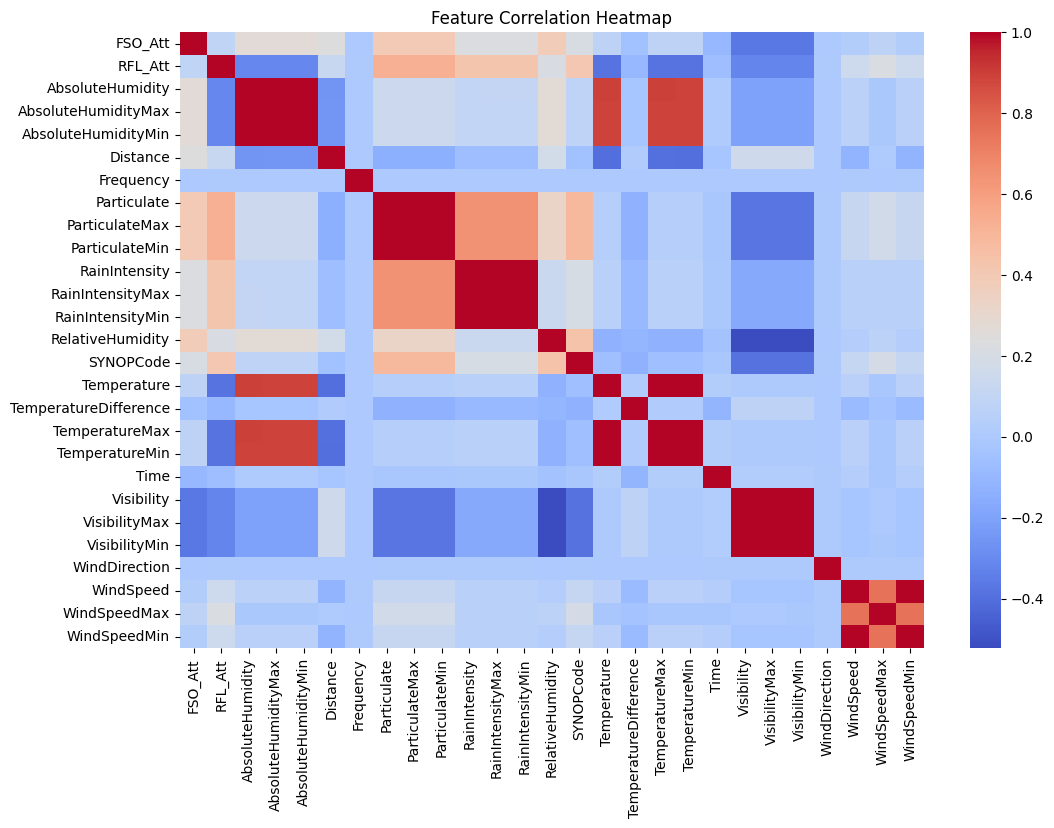

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [54]:
# 选择与 FSO_Att 高相关的特征
selected_features_fso = [
    'Particulate', 'ParticulateMin', 'ParticulateMax',
    'RelativeHumidity', 'AbsoluteHumidity',
    'Distance', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin'
]
X_fso = data[selected_features_fso]



In [55]:
# 选择与 RFL_Att 高负相关的特征
selected_features_rfl = [
    'Particulate', 'ParticulateMin', 'ParticulateMax',
    'RainIntensity', 'RainIntensityMax', 'RainIntensityMin',
    'SYNOPCode', 'AbsoluteHumidity', 'Visibility', 'Temperature',
    'TemperatureMin', 'TemperatureMax'
]
X_rfl = data[selected_features_rfl]


In [56]:
# 定义特征集和目标变量
selected_features = [
    'Particulate', 'ParticulateMin', 'ParticulateMax',
    'RelativeHumidity', 'AbsoluteHumidity',
    'Distance', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin'
]
selected_features_with_code = selected_features + ['SYNOPCode']
X = data[selected_features]  # 只选择相关特征
y_fso = data['FSO_Att']      # 目标变量 FSO_Att
y_rfl = data['RFL_Att']      # 目标变量 RFL_Att

In [57]:
X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X, y_fso, test_size=0.3, random_state=42)
X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X, y_rfl, test_size=0.3, random_state=42)

In [58]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']  
}

In [59]:
def train_general_model(X_train, y_train, param_dist, model_name="Model"):
    random_search = RandomizedSearchCV(
        RandomForestRegressor(random_state=42),
        param_distributions=param_dist,
        n_iter=5,  # 搜索次数
        cv=3,
        scoring='neg_mean_squared_error',
        random_state=42
    )
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    print(f"Best Parameters for {model_name}:", random_search.best_params_)
    return best_model

# 训练 FSO_Att 的通用模型
fso_general_model = train_general_model(X_train_fso, y_train_fso, param_dist, "FSO_Att General Model")
# 训练 RFL_Att 的通用模型
rfl_general_model = train_general_model(X_train_rfl, y_train_rfl, param_dist, "RFL_Att General Model")


Best Parameters for FSO_Att General Model: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20}
Best Parameters for RFL_Att General Model: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}


In [61]:
# 使用最佳参数重新训练 FSO_Att 的通用模型
fso_best_params = {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20}
fso_final_model = RandomForestRegressor(**fso_best_params, random_state=42)
fso_final_model.fit(X_train_fso, y_train_fso)

# 使用最佳参数重新训练 RFL_Att 的通用模型
rfl_best_params = {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}
rfl_final_model = RandomForestRegressor(**rfl_best_params, random_state=42)
rfl_final_model.fit(X_train_rfl, y_train_rfl)


RandomForestRegressor(max_features=None, min_samples_leaf=2, n_estimators=50,
                      random_state=42)

In [62]:
# 评估 FSO_Att 模型
fso_y_pred = fso_final_model.predict(X_test_fso)
fso_final_mse = mean_squared_error(y_test_fso, fso_y_pred)
fso_final_r2 = r2_score(y_test_fso, fso_y_pred)
print(f"FSO_Att Final Model - MSE: {fso_final_mse}, R²: {fso_final_r2}")

# 评估 RFL_Att 模型
rfl_y_pred = rfl_final_model.predict(X_test_rfl)
rfl_final_mse = mean_squared_error(y_test_rfl, rfl_y_pred)
rfl_final_r2 = r2_score(y_test_rfl, rfl_y_pred)
print(f"RFL_Att Final Model - MSE: {rfl_final_mse}, R²: {rfl_final_r2}")



FSO_Att Final Model - MSE: 1.9859364349129573, R²: 0.8673051940012757
RFL_Att Final Model - MSE: 0.6811103783780061, R²: 0.941954906733681


In [63]:
fso_general_y_pred = fso_general_model.predict(X_test_fso)
fso_general_mse = mean_squared_error(y_test_fso, fso_general_y_pred)
fso_general_r2 = r2_score(y_test_fso, fso_general_y_pred)
print(f"FSO_Att General Model - MSE: {fso_general_mse}, R²: {fso_general_r2}")

rfl_general_y_pred = rfl_general_model.predict(X_test_rfl)
rfl_general_mse = mean_squared_error(y_test_rfl, rfl_general_y_pred)
rfl_general_r2 = r2_score(y_test_rfl, rfl_general_y_pred)
print(f"RFL_Att General Model - MSE: {rfl_general_mse}, R²: {rfl_general_r2}")


FSO_Att General Model - MSE: 1.9859364349129573, R²: 0.8673051940012757
RFL_Att General Model - MSE: 0.6811103783780061, R²: 0.941954906733681


In [64]:
# 打印性能对比
print(f"FSO_Att - General Model: MSE = {fso_general_mse}, R² = {fso_general_r2}")
print(f"FSO_Att - Final Model:   MSE = {fso_final_mse}, R² = {fso_final_r2}")

print(f"RFL_Att - General Model: MSE = {rfl_general_mse}, R² = {rfl_general_r2}")
print(f"RFL_Att - Final Model:   MSE = {rfl_final_mse}, R² = {rfl_final_r2}")


FSO_Att - General Model: MSE = 1.9859364349129573, R² = 0.8673051940012757
FSO_Att - Final Model:   MSE = 1.9859364349129573, R² = 0.8673051940012757
RFL_Att - General Model: MSE = 0.6811103783780061, R² = 0.941954906733681
RFL_Att - Final Model:   MSE = 0.6811103783780061, R² = 0.941954906733681


In [65]:
from sklearn.model_selection import cross_val_score

fso_cv_scores = cross_val_score(fso_final_model, X_fso, y_fso, cv=5, scoring='r2')
print("FSO_Att Cross-Validation R² Scores:", fso_cv_scores)
print("Mean R²:", fso_cv_scores.mean())

rfl_cv_scores = cross_val_score(rfl_final_model, X_rfl, y_rfl, cv=5, scoring='r2')
print("RFL_Att Cross-Validation R² Scores:", rfl_cv_scores)
print("Mean R²:", rfl_cv_scores.mean())


FSO_Att Cross-Validation R² Scores: [-0.77073822  0.82868697  0.81785584  0.81439781  0.53254562]
Mean R²: 0.44454960672388866
RFL_Att Cross-Validation R² Scores: [0.45109392 0.83195379 0.108471   0.85149274 0.58626562]
Mean R²: 0.5658554134391703


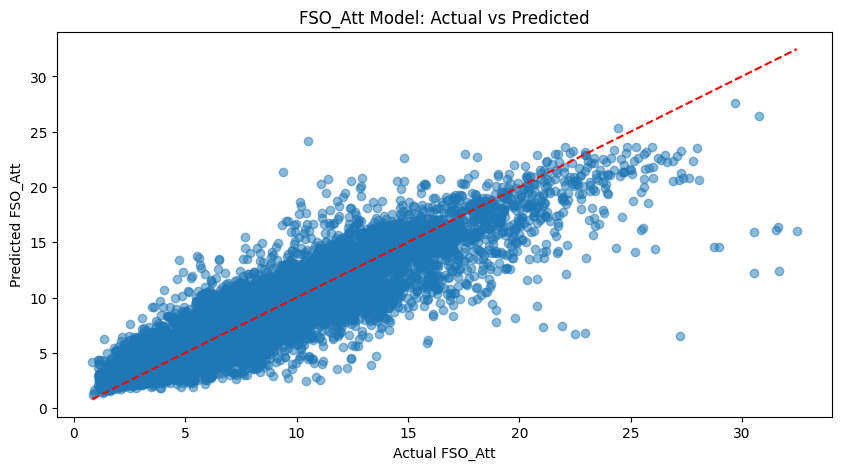

In [66]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_fso, fso_y_pred, alpha=0.5)
plt.plot([min(y_test_fso), max(y_test_fso)], [min(y_test_fso), max(y_test_fso)], color='red', linestyle='--')
plt.xlabel("Actual FSO_Att")
plt.ylabel("Predicted FSO_Att")
plt.title("FSO_Att Model: Actual vs Predicted")
plt.show()

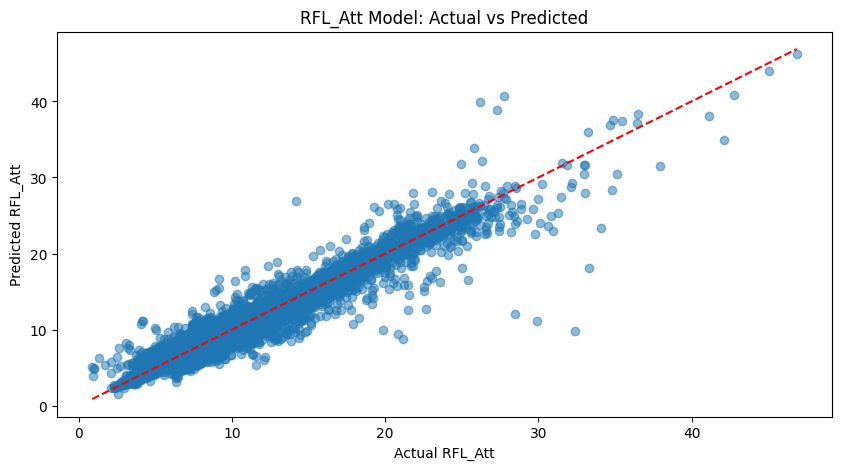

In [67]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_rfl, rfl_y_pred, alpha=0.5)
plt.plot([min(y_test_rfl), max(y_test_rfl)], [min(y_test_rfl), max(y_test_rfl)], color='red', linestyle='--')
plt.xlabel("Actual RFL_Att")
plt.ylabel("Predicted RFL_Att")
plt.title("RFL_Att Model: Actual vs Predicted")
plt.show()

In [68]:
# 添加 'SYNOPCode' 列回到 X_test_fso 和 X_test_rfl
X_test_fso = X_test_fso.copy()
X_test_fso['SYNOPCode'] = data.loc[X_test_fso.index, 'SYNOPCode']

X_test_rfl = X_test_rfl.copy()
X_test_rfl['SYNOPCode'] = data.loc[X_test_rfl.index, 'SYNOPCode']


In [69]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# 初始化空的数据框
results_df = pd.DataFrame(columns=['SYNOPCode', 'specific_r2', 'generic_r2', 'specific_mse', 'generic_mse'])

# 获取唯一的天气条件编码
unique_synop_codes = X_test_fso['SYNOPCode'].unique()

# 针对每个天气条件分别评估模型
for code in unique_synop_codes:
    # 筛选该条件的数据
    X_test_code = X_test_fso[X_test_fso['SYNOPCode'] == code]
    y_test_code_fso = y_test_fso[X_test_fso['SYNOPCode'] == code]
    
    # 特定模型预测
    specific_pred = fso_final_model.predict(X_test_code.drop(columns=['SYNOPCode']))
    specific_r2 = r2_score(y_test_code_fso, specific_pred)
    specific_mse = mean_squared_error(y_test_code_fso, specific_pred)
    
    # 通用模型预测
    generic_pred = fso_general_model.predict(X_test_code.drop(columns=['SYNOPCode']))
    generic_r2 = r2_score(y_test_code_fso, generic_pred)
    generic_mse = mean_squared_error(y_test_code_fso, generic_pred)
    
    # 将每个天气条件下的评估结果添加到 results_df
    new_row = pd.DataFrame({
        'SYNOPCode': [code],
        'specific_r2': [specific_r2],
        'generic_r2': [generic_r2],
        'specific_mse': [specific_mse],
        'generic_mse': [generic_mse]
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# 打印 results_df 确认数据
print(results_df)




  SYNOPCode  specific_r2  generic_r2  specific_mse  generic_mse
0         0     0.839238    0.839238      1.926656     1.926656
1         6     0.902291    0.902291      1.786404     1.786404
2         8     0.881214    0.881214      1.740591     1.740591
3         4     0.836266    0.836266      2.467385     2.467385
4         5     0.851061    0.851061      1.938856     1.938856
5         7     0.829528    0.829528      5.722402     5.722402
6         3     0.422884    0.422884     44.747184    44.747184


C:\Users\发烧了啊\AppData\Local\Temp\ipykernel_4780\2205956381.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


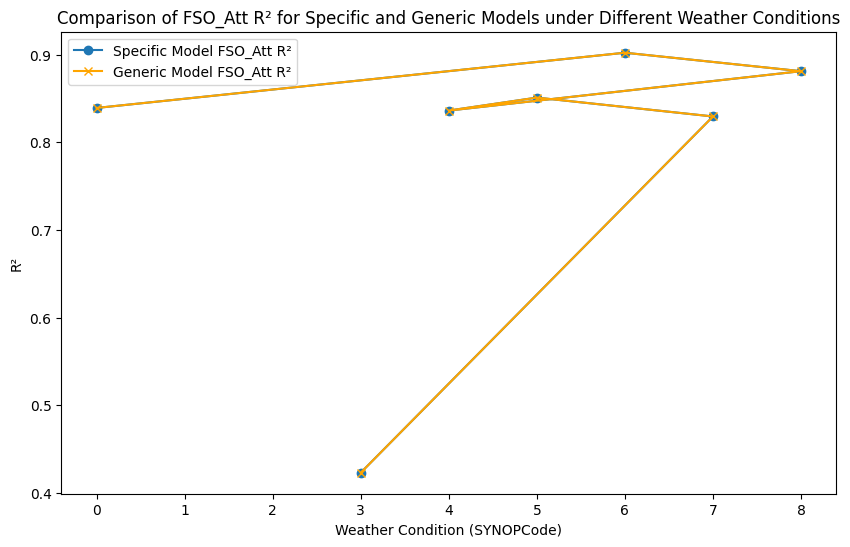

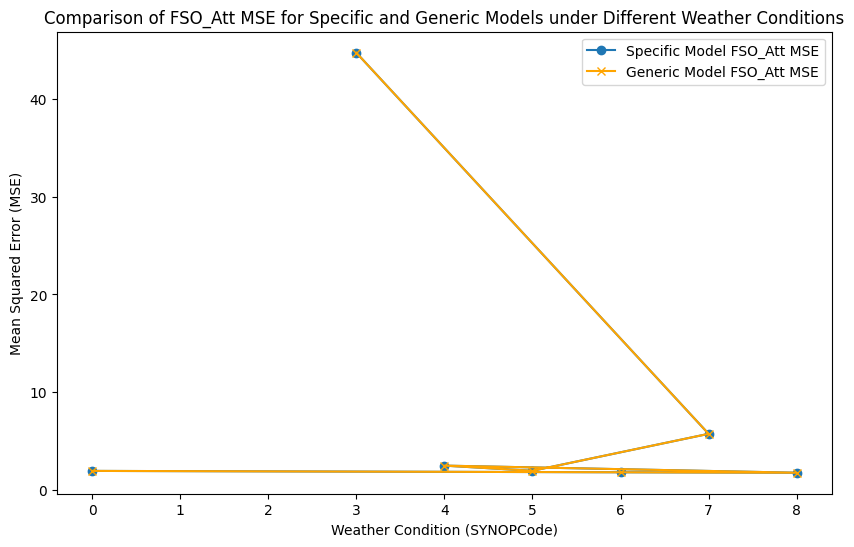

In [70]:
import matplotlib.pyplot as plt

# 绘制 R² 比较图
plt.figure(figsize=(10, 6))
plt.plot(results_df['SYNOPCode'], results_df['specific_r2'], marker='o', label='Specific Model FSO_Att R²')
plt.plot(results_df['SYNOPCode'], results_df['generic_r2'], marker='x', color='orange', label='Generic Model FSO_Att R²')
plt.xlabel('Weather Condition (SYNOPCode)')
plt.ylabel('R²')
plt.title('Comparison of FSO_Att R² for Specific and Generic Models under Different Weather Conditions')
plt.legend()
plt.show()

# 绘制 MSE 比较图
plt.figure(figsize=(10, 6))
plt.plot(results_df['SYNOPCode'], results_df['specific_mse'], marker='o', label='Specific Model FSO_Att MSE')
plt.plot(results_df['SYNOPCode'], results_df['generic_mse'], marker='x', color='orange', label='Generic Model FSO_Att MSE')
plt.xlabel('Weather Condition (SYNOPCode)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of FSO_Att MSE for Specific and Generic Models under Different Weather Conditions')
plt.legend()
plt.show()


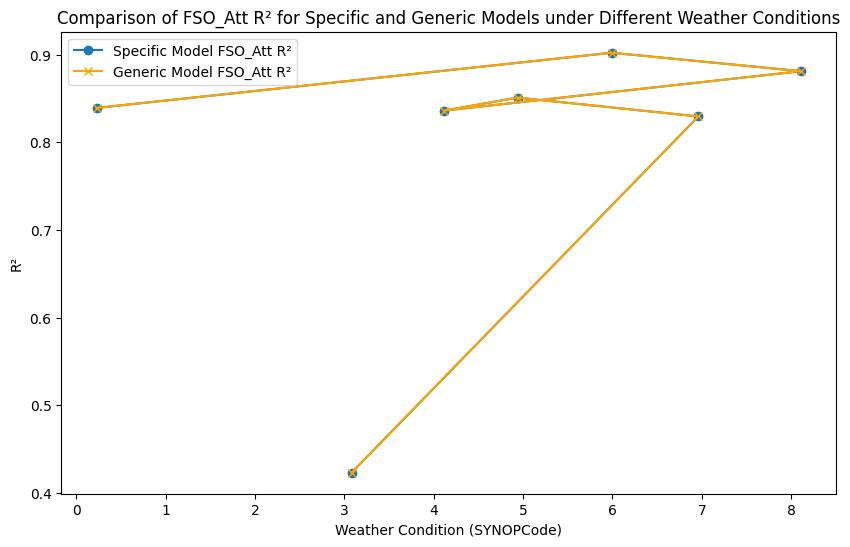

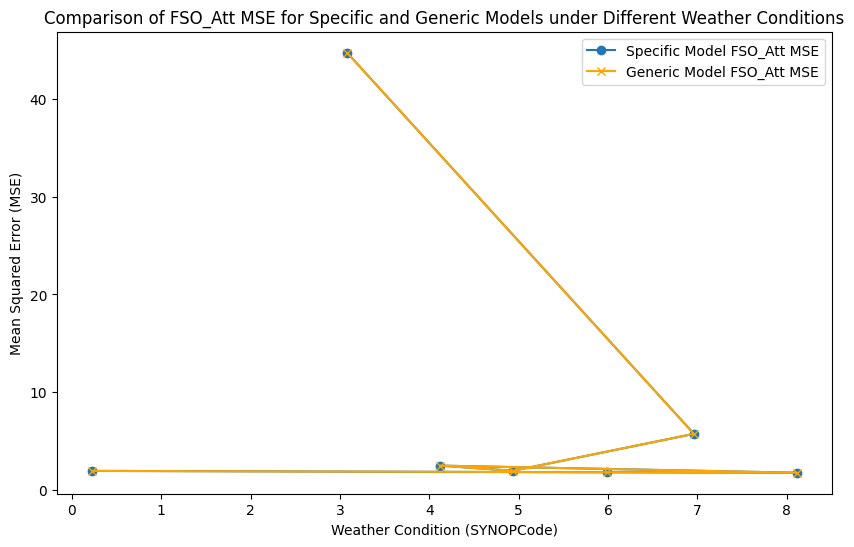

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# 给 SYNOPCode 添加微小的抖动
jittered_synop_codes = results_df['SYNOPCode'] + np.random.normal(0, 0.1, size=len(results_df))

# 绘制 R² 比较图
plt.figure(figsize=(10, 6))
plt.plot(jittered_synop_codes, results_df['specific_r2'], marker='o', label='Specific Model FSO_Att R²')
plt.plot(jittered_synop_codes, results_df['generic_r2'], marker='x', color='orange', label='Generic Model FSO_Att R²')
plt.xlabel('Weather Condition (SYNOPCode)')
plt.ylabel('R²')
plt.title('Comparison of FSO_Att R² for Specific and Generic Models under Different Weather Conditions')
plt.legend()
plt.show()

# 绘制 MSE 比较图
plt.figure(figsize=(10, 6))
plt.plot(jittered_synop_codes, results_df['specific_mse'], marker='o', label='Specific Model FSO_Att MSE')
plt.plot(jittered_synop_codes, results_df['generic_mse'], marker='x', color='orange', label='Generic Model FSO_Att MSE')
plt.xlabel('Weather Condition (SYNOPCode)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of FSO_Att MSE for Specific and Generic Models under Different Weather Conditions')
plt.legend()
plt.show()


In [78]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train_fso.columns,  # 使用训练集中的特征名称
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 检查数据框内容
print(feature_importance_df)

            Feature  Importance
5          Distance    0.399142
4  AbsoluteHumidity    0.172047
3  RelativeHumidity    0.148351
1    ParticulateMin    0.143634
0       Particulate    0.087100
2    ParticulateMax    0.036971
6     RainIntensity    0.004869
7  RainIntensityMax    0.004099
8  RainIntensityMin    0.003787


C:\Users\发烧了啊\AppData\Local\Temp\ipykernel_4780\253146144.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_filtered, palette='viridis')


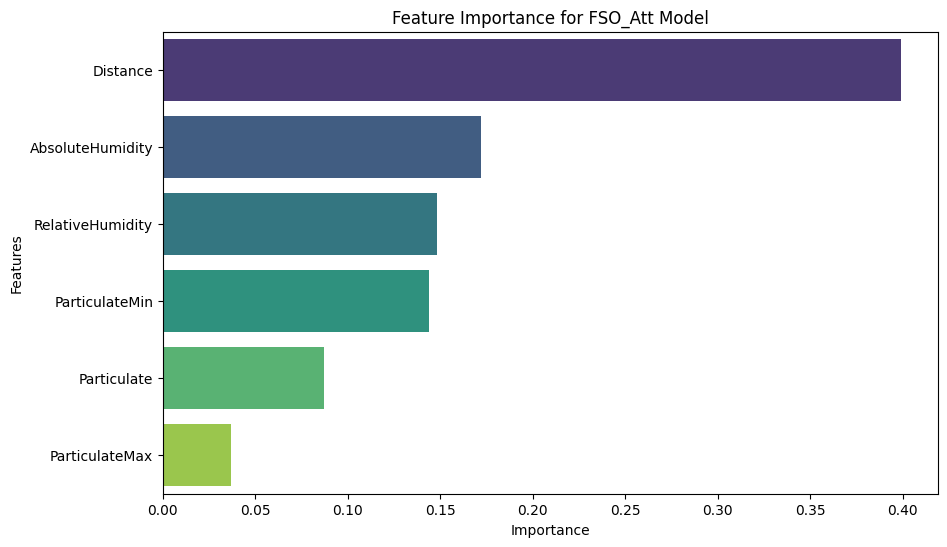

In [79]:
import seaborn as sns
feature_importances = fso_final_model.feature_importances_
# 设置特征重要性的阈值，并筛选重要性较高的特征
feature_importance_df_filtered = feature_importance_df[feature_importance_df['Importance'] > 0.01]

# 或者只选择前 10 个重要性最高的特征
# feature_importance_df_filtered = feature_importance_df.nlargest(10, 'Importance')

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_filtered, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for FSO_Att Model')
plt.show()
